# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()
analyzer = SentimentIntensityAnalyzer()

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrewunruh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 7591


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Khari Johnson',
 'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
 'description': 'Autonomous vehicles use the equivalent of 200 laptops to get around. Some want to tap that computing power to decode viruses or mine bitcoin.',
 'url': 'https://www.wired.com/story/use-self-driving-cars-supercomputers/',
 'urlToImage': 'https://media.wired.com/photos/60f081b4c147fe7a1a367362/191:100/w_1280,c_limit/Business-Autonomous-Vehicles-Supercomputers-1201885684.jpg',
 'publishedAt': '2021-07-19T11:00:00Z',
 'content': 'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 2467


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...
3,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...
4,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...
2,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...
3,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.019345,0.058500,0.059750,0.881750
std,0.484055,0.058633,0.090311,0.101771
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.405525,0.000000,0.000000,0.836000
50%,0.000000,0.056000,0.000000,0.906000
75%,0.315000,0.092500,0.088250,0.940000
max,0.726400,0.178000,0.287000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.244345,0.073250,0.01345,0.91330
std,0.344475,0.079278,0.02766,0.08322
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84050
50%,0.125000,0.037500,0.00000,0.92650
75%,0.557175,0.151750,0.00000,1.00000
max,0.771700,0.194000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score with .073.

Q: Which coin had the highest compound score?

A: Etherem also had the highest compound score with a max of 77%.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score with .194.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewunruh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

# Expand the default stopwords list if necessary


In [47]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    return tokens

In [50]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.Text.apply(tokenizer)
bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
1,-0.5719,0.111,0.184,0.705,Filed under:\r\nThe supply chain attack has re...,"[filed, underthe, supply, chain, attack, ha, r..."
2,-0.6124,0.000,0.143,0.857,image copyrightGetty Images\r\nThe gang behind...,"[image, copyrightgetty, imagesthe, gang, behin..."
3,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
4,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."


In [51]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.Text.apply(tokenizer)
ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
2,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
3,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, adfree, creator, network, ..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [57]:
# Generate the Bitcoin N-grams where N=2
grams_bitcoins = ngrams(tokenizer(bitcoin_df.Text.str.cat()), 2)
word_counts_bitcoin = Counter(grams_bitcoins)

In [58]:
# Generate the Ethereum N-grams where N=2
grams_ethereum = ngrams(tokenizer(ethereum_df.Text.str.cat()), 2)
word_counts_ethereum = Counter(grams_ethereum)

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    top_10 = (dict(tokens.most_common(10)))
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
token_count(word_counts_bitcoin)

[(('illustration', 'taken'), 5),
 (('july', 'reuters'), 3),
 (('reuters', 'bitcoin'), 3)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
token_count(word_counts_ethereum)

[(('cryptocurrency', 'ethereum'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('pc', 'motherboard'), 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

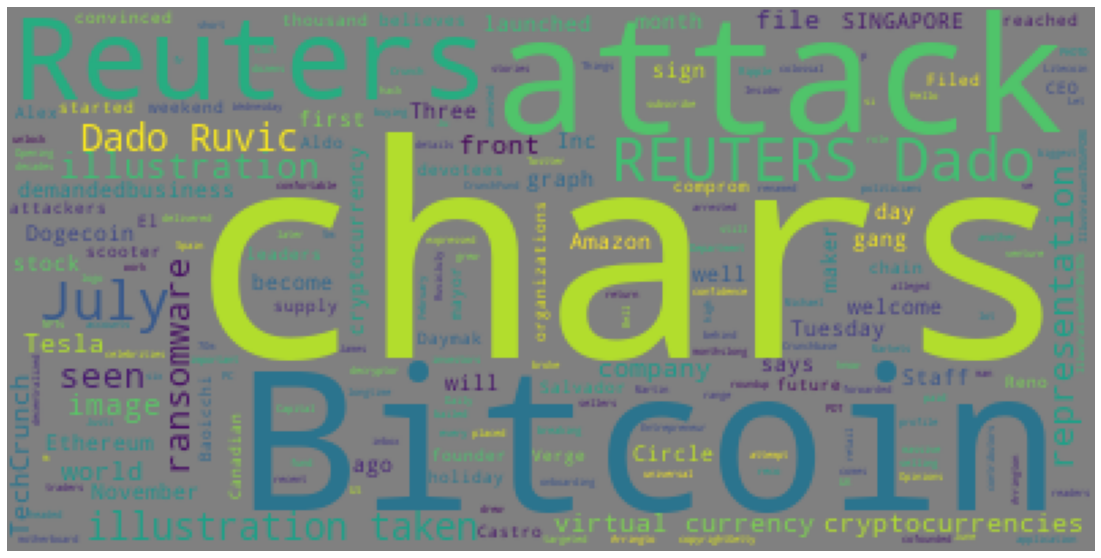

In [68]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(bitcoin_df.Text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

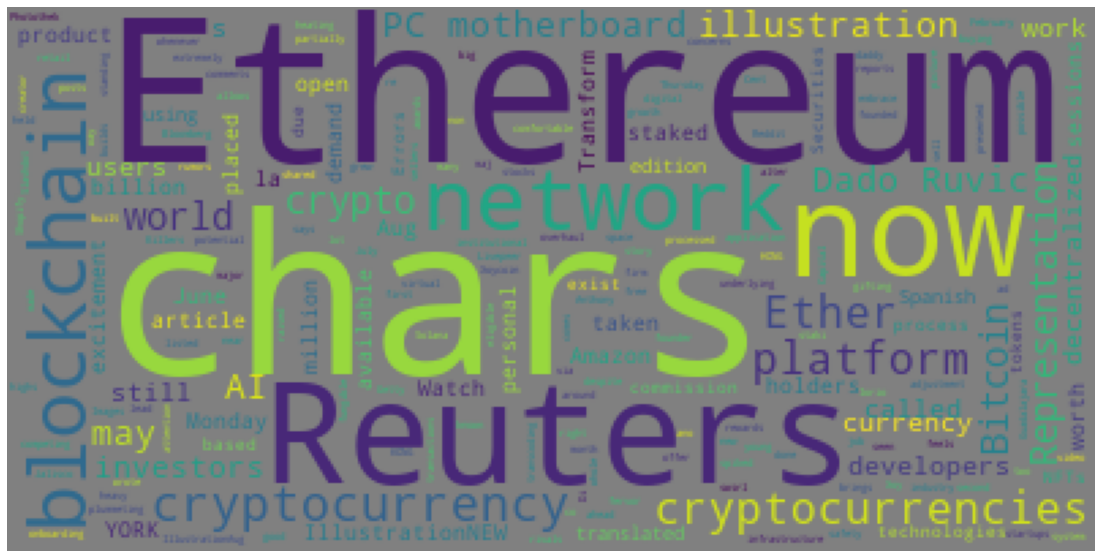

In [69]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(ethereum_df.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [70]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = bitcoin_df.Text.str.cat()
all_concat_bitcoin

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application

In [71]:
# Run the NER processor on all of the text
# Add a title to the document
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [72]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [73]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuter

---

### Ethereum NER

In [74]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = ethereum_df.Text.str.cat()
all_concat_ethereum

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/

In [75]:
# Run the NER processor on all of the text
# Add a title to the document
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [76]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [77]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DAT

---